In [1]:
from utils import *
from helpers import *
import pandas as pd
from params import *
import os

In [2]:
[sum(row) for i, row in enumerate(OD_MATRIX) if i not in FLEX_STOPS]

[16.5, 13.5, 10.0, 3.5]

In [3]:
hourly_fixed_demand = sum([sum(row) for i, row in enumerate(OD_MATRIX) if i not in FLEX_STOPS])
hourly_flex_demand = sum([sum(row) for i, row in enumerate(OD_MATRIX) if i in FLEX_STOPS])
pct_fixed = round(hourly_fixed_demand/(hourly_fixed_demand + hourly_flex_demand)*100, 2)
pct_flex = round(hourly_flex_demand/(hourly_fixed_demand + hourly_flex_demand)*100, 2)
print(f'100% demand: {hourly_fixed_demand + hourly_flex_demand}')
print(f'Fixed demand: {hourly_fixed_demand} ({pct_fixed} %)')
print(f'Flex demand: {hourly_flex_demand} ({pct_flex} %)')

100% demand: 54.0
Fixed demand: 43.5 (80.56 %)
Flex demand: 10.5 (19.44 %)


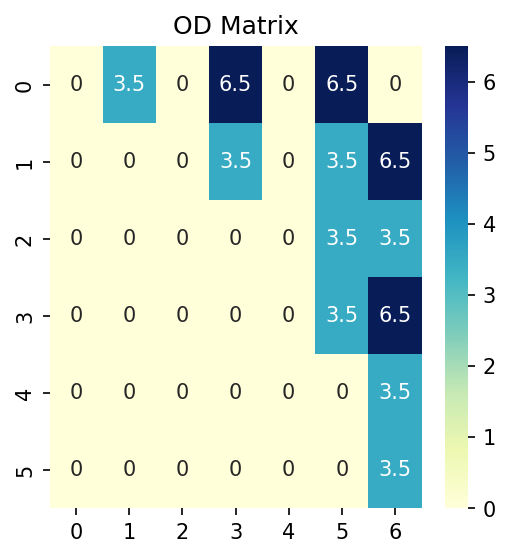

In [4]:
get_heatmap(OD_MATRIX, "OD Matrix")

In [7]:
# plot_min_pax_threshold(DEFAULT_MIN_PAX_THRESHOLDS)

In [8]:
# 
# plot_exponential_decay_by_factor()

In [9]:
# from objects import RouteManager, EventManager
# route = RouteManager()
# event = EventManager()
# event.start_vehicles(route)
# route.load_all_pax()

### calibrate DSD

In [26]:
tstamp = '1105-142625'
RESULTS_PATH = os.path.join(OUTPUT_FOLDER_PATH,'DRD_calibration_experiments_'+tstamp)
table, table_pcts = tabulate_improvements(RESULTS_PATH, ON_TIME_BOUNDS, base_scenario='DRD_param_1', 
                                          flex_stops=FLEX_STOPS, start_time=RESULTS_START_TIME_MINUTES*60, end_time=RESULTS_END_TIME_MINUTES*60)

In [27]:
table

,idle_time,wait_time,headway_cv,load,n_denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips,on_time_trips,avg_delay,n_deviations,avg_reward,avg_episode_reward,on_time_rate,served_rate
scenario,,,,,,,,,,,,,,,,
DRD_param_0,3.23,304.0,0.182,3.52,690,6369,878,7247,924,766,48.0,497,-1.101,-37.217,82.90,55.99
DRD_param_1,3.04,310.0,0.189,3.47,713,6372,839,7211,922,770,48.0,487,-1.097,-37.217,83.51,54.06
DRD_param_2,3.38,305.0,0.173,3.45,770,6376,789,7165,924,821,36.0,473,-1.024,-35.600,88.85,50.61
DRD_param_3,3.38,305.0,0.173,3.45,770,6376,789,7165,924,821,36.0,473,-1.024,-35.600,88.85,50.61
DRD_param_4,3.95,305.0,0.152,3.45,813,6411,761,7172,920,834,26.0,455,-1.039,-35.317,90.65,48.35


### all scenarios

In [12]:
# rename_scenarios = {
#     'SD': 'FRD',
#     'DSD': 'DRD',
#     'RL': 'RL',
#     'RA': 'RA',
#     'AD': 'AD',
#     'ND': 'ND'
# }
# for df in [state, idle, pax, trips]:
#     df['scenario'] = df['scenario'].map(rename_scenarios)

In [20]:
tstamp = '1105-141945'
RESULTS_PATH = os.path.join(OUTPUT_FOLDER_PATH,'experiments_'+tstamp)
table, table_pcts = tabulate_improvements(RESULTS_PATH, ON_TIME_BOUNDS, base_scenario='ND', 
                                          flex_stops=FLEX_STOPS, start_time=RESULTS_START_TIME_MINUTES*60, 
                                          end_time=RESULTS_END_TIME_MINUTES*60)

In [21]:
idle, pax, state, trips = read_results(RESULTS_PATH)

Text(0, 0.5, 'Average delay (s)')

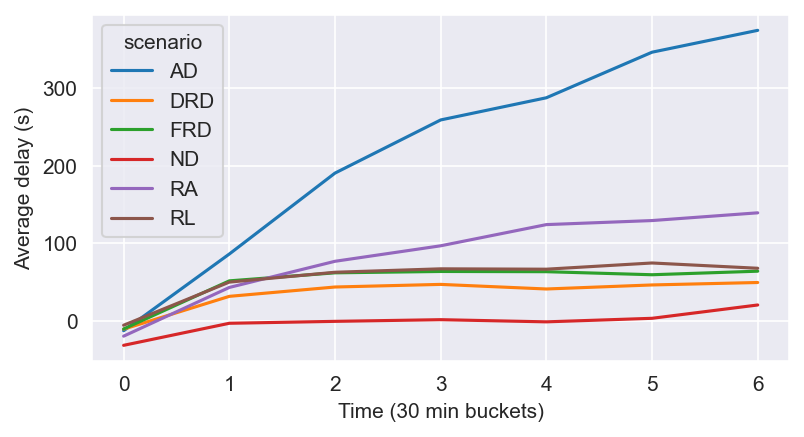

In [22]:
## get evolution of delay overtime by scenario with 30 minute buckets
tmp_trips = trips[['scenario', 'arrival_time', 'delay','bucket']].copy()
## remove maximum bucket
tmp_trips = tmp_trips[tmp_trips['bucket'] < MAX_TIME_HOURS*3600 // 30*60]

fig, axs = plt.subplots(figsize=(6,3))
sns.set_style('darkgrid')
sns.lineplot(data=tmp_trips.groupby(['scenario', 'bucket']).agg({'delay': 'mean'}).reset_index(), x='bucket', y='delay', hue='scenario', ax=axs)
axs.set_xlabel('Time (30 min buckets)')
axs.set_ylabel('Average delay (s)')

In [16]:
# table, table_pcts = tabulate_improvements(state, idle, pax, trips, ON_TIME_BOUNDS, base_scenario='ND', flex_stops=FLEX_STOPS)

In [23]:
table

,idle_time,wait_time,headway_cv,load,n_denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips,on_time_trips,avg_delay,n_deviations,avg_reward,avg_episode_reward,on_time_rate,served_rate
scenario,,,,,,,,,,,,,,,,
AD,1.68,387.0,0.567,3.83,478,6244,1105.0,7349,889,360,227.0,891,-2.404,-71.400,40.49,69.80
DRD,2.88,305.0,0.168,3.39,807,6381,701.0,7082,918,777,45.0,407,-1.273,-42.933,84.64,46.49
FRD,1.86,305.0,0.180,3.47,770,6414,744.0,7158,913,728,64.0,517,-1.380,-45.867,79.74,49.14
ND,10.06,301.0,0.169,2.90,1462,6283,NaN,6283,931,857,1.0,0,-1.722,-58.600,92.05,0.00
RA,4.45,328.0,0.355,3.43,854,6286,682.0,6968,918,622,91.0,483,-1.869,-60.867,67.76,44.40
RL,2.34,313.0,0.254,3.38,825,6260,730.0,6990,910,742,66.0,490,-1.376,-45.600,81.54,46.95


## finetune reward weights for trade-off type rewards

TODO: Pareto optimality between competing objectives??

In [24]:
def plot_avg_reward_per_scenario(rewards_per_scenario: pd.Series, axs):
    # Sort by average reward
    rewards_per_scenario = rewards_per_scenario.sort_values(by='scenario')
    sns.boxplot(x='total_w_reward', y='scenario', data=rewards_per_scenario, ax=axs)

def get_avg_weighted_rewards(rewards_per_step: pd.DataFrame, weights: list,
                             reward_fields: list):
    rewards = rewards_per_step.copy()
    rewards['total_w_reward'] = 0
    for i, field in enumerate(reward_fields):
        rewards['total_w_reward'] -= rewards[field] * weights[i]
    episode_reward = rewards.groupby(['scenario', 'episode'])['total_w_reward'].sum().reset_index()
    # episode_reward = episode_reward.groupby(['scenario']).mean()
    return episode_reward

def plot_reward_weights_comparison(state: pd.DataFrame, weights_set: list):
    width_per_ax = 2.7
    height = 2.3
    n_weights = len(weights_set)
    fig, axs = plt.subplots(ncols=n_weights, figsize=(n_weights*width_per_ax, height))
    reward_fields = ['denied', 'early', 'late']
    tmp_state = state[['scenario', 'episode'] + reward_fields].copy()
    for i, weights in enumerate(weights_set):
        tmp_rew = get_avg_weighted_rewards(tmp_state, weights, reward_fields)
        if n_weights > 1:
            plot_avg_reward_per_scenario(tmp_rew, axs[i])
            axs[i].set_title(f'Weights: {weights}')
        else:
            plot_avg_reward_per_scenario(tmp_rew, axs)
            axs.set_title(f'Weights: {weights}')


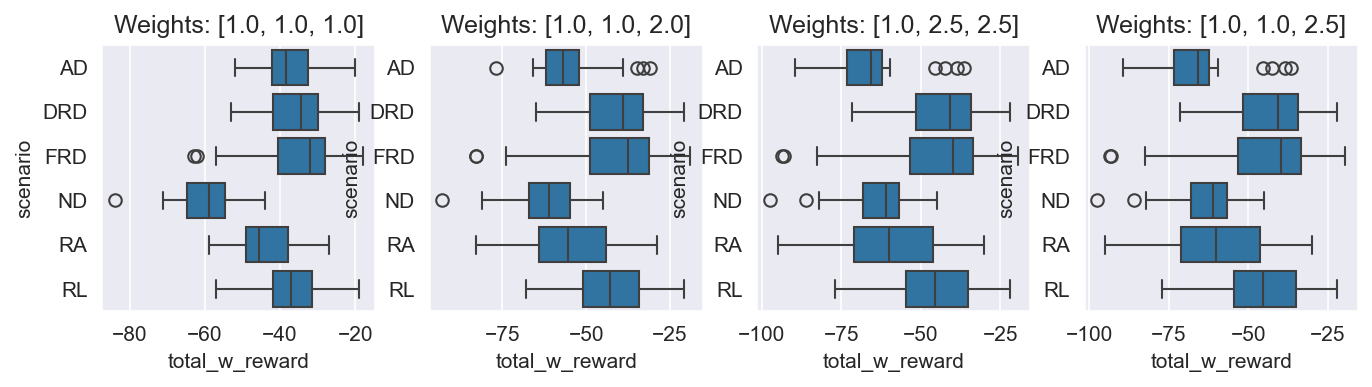

In [25]:
weights = [[1.0,1.0,1.0], [1.0,1.0,2.0], [1.0,2.5,2.5], [1.0,1.0,2.5]]
plot_reward_weights_comparison(state, weights)

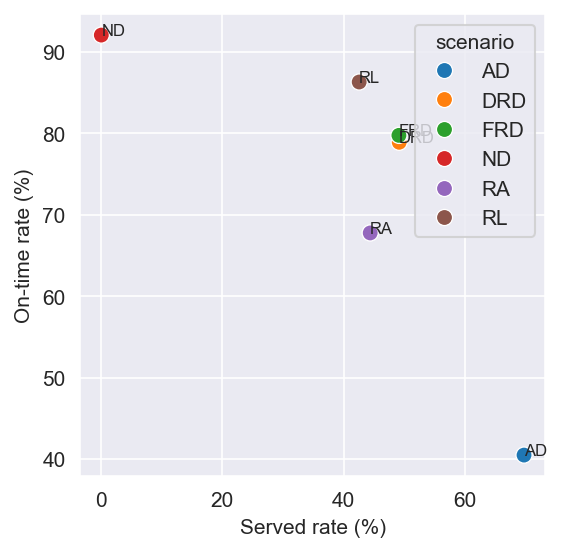

In [58]:
fig, axs = plt.subplots(figsize=(4,4))
## make background of axis dark
sns.set_style("darkgrid")
sns.scatterplot(data=table, x='served_rate', y='on_time_rate', hue='scenario', ax=axs, s=60)
axs.set_xlabel('Served rate (%)')
axs.set_ylabel('On-time rate (%)')
## set legend outside of plot
# axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# x_line, y_line = 35, 80
## add legend labels to dots
for i, txt in enumerate(table.index):
    axs.annotate(txt, (table['served_rate'][i], table['on_time_rate'][i]), fontsize=8)
# axs.axvline(x=x_line, color='r', linestyle='--')
# axs.axhline(y=y_line, color='r', linestyle='--')


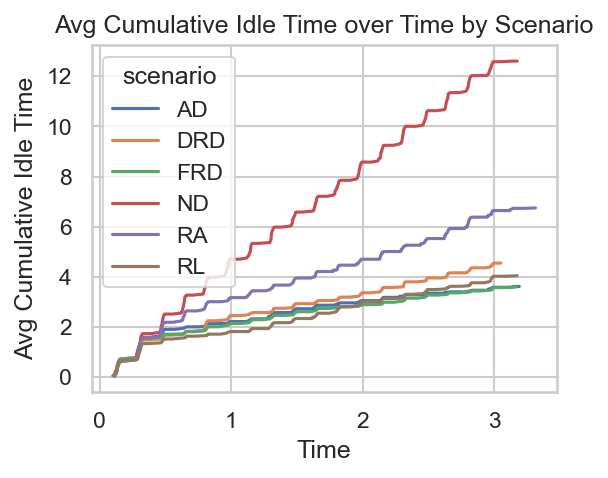

In [59]:
idle_for_plot = idle.copy()
idle_for_plot['idle_time'] = idle_for_plot['idle_time']/60/60
idle_for_plot['time'] = idle_for_plot['time']/60/60
plot_cumulative_idle_time(idle_for_plot)

## debugging

In [1]:
from objects import RouteManager, EventManager

route = RouteManager()
event = EventManager()
event.start_vehicles(route)
route.load_all_pax()

obs, reward, terminated, truncated, info = event.step(route, action=None)
# while not terminated:
#     obs, reward, terminated, truncated, info = event.step(route, action=True)

In [ ]:
event.timestamps[-1]

In [ ]:
pax.groupby(['origin', 'destination']).size().reset_index()

In [ ]:
for direction in ('in', 'out'):
    for s in route.stops[direction]:
        if s.active_pax:
            print([(direction, p.origin, p.destination, p.arrival_time) for p in s.active_pax])